In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

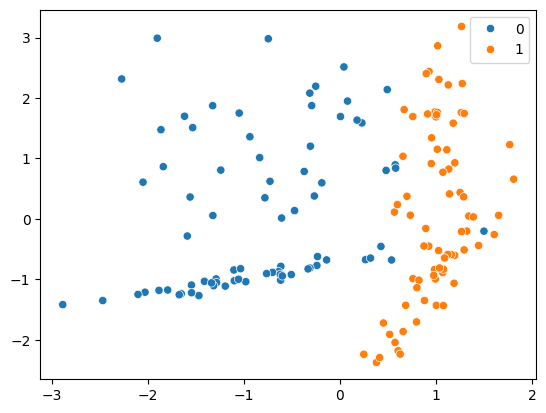

In [21]:
from sklearn.datasets import make_classification

# Create a 2D dataset
X, y = make_classification(
    n_samples=150,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=2,
    # random_state=
)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)



In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

def plot_decision_tree_regions(X, y, max_depth=None, criteria = 'gini', split = 'best', maxF = 2):
    # Scale features for better plotting
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train the decision tree with given max_depth
    # splitting random reduce the overfitting
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion=criteria, splitter=split, max_features=maxF)
    clf.fit(X_scaled, y)

    # Create meshgrid
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    # Predict labels over the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(grid_points).reshape(xx.shape)

    # Plot decision regions
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    plt.title(f"Decision Tree Decision Boundary (max_depth={max_depth})")
    plt.xlabel("Feature 1 (scaled)")
    plt.ylabel("Feature 2 (scaled)")
    plt.show()


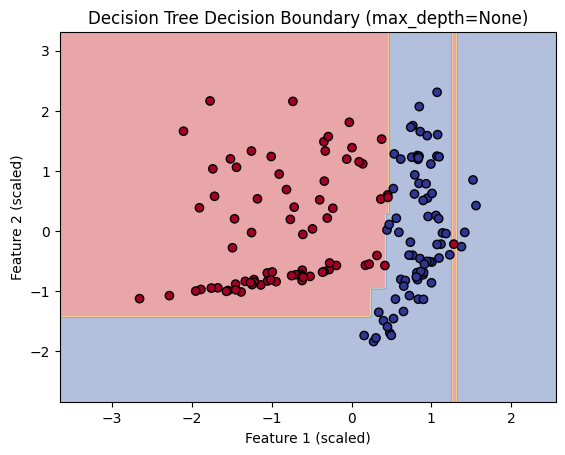

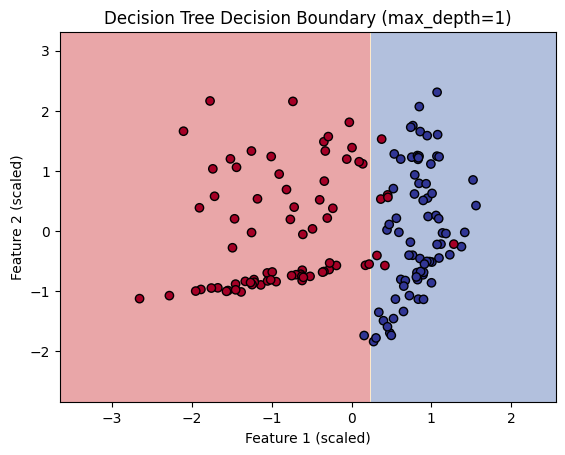

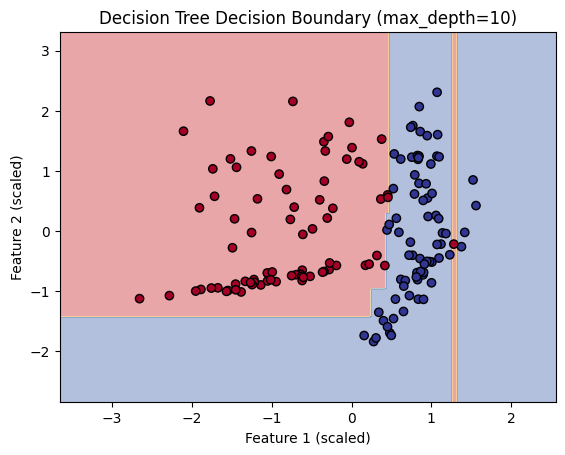

In [23]:
# Call the function with and without max_depth
plot_decision_tree_regions(X, y, max_depth=None)   # overfitting
plot_decision_tree_regions(X, y, max_depth=1)      # underfitting
plot_decision_tree_regions(X, y, max_depth=10)      # 

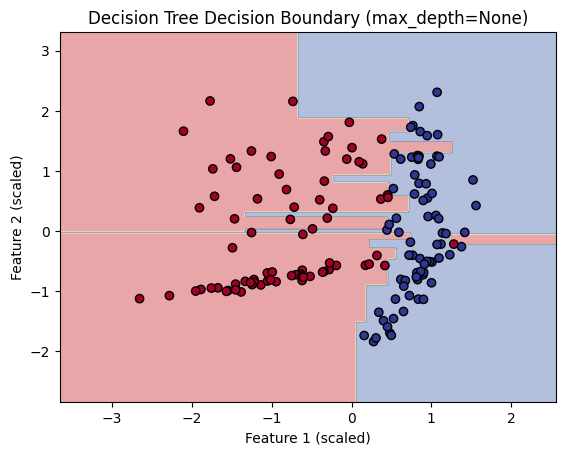

In [30]:
plot_decision_tree_regions(X, y, max_depth=None, split='random', maxF=1)

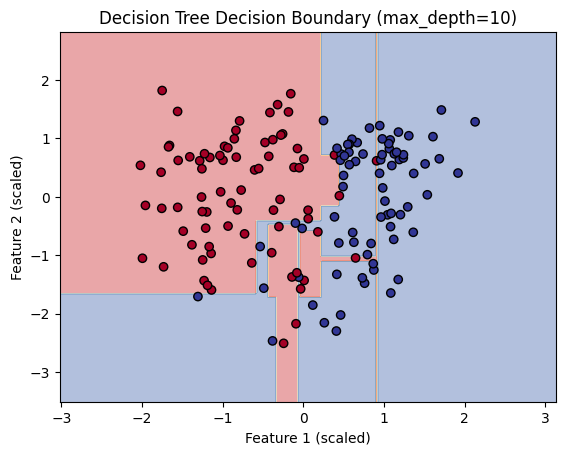

In [ ]:
plot_decision_tree_regions(X, y, max_depth=10, criteria='entropy')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

def visualize_decision_tree(X, y, max_depth=None, feature_names=None, class_names=None):
    """
    Trains and visualizes a Decision Tree classifier.

    Parameters:
    - X: Feature matrix (numpy array or DataFrame)
    - y: Target labels
    - max_depth: Max depth of the tree (None for full depth)
    - feature_names: List of feature names
    - class_names: List of class names (strings)

    Returns:
    - clf: Trained DecisionTreeClassifier
    """
    
    # Train the model
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X, y)

    # Plot the tree
    plt.figure(figsize=(20, 10))
    plot_tree(
        clf,
        filled=True,
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,
        fontsize=10
    )
    plt.title(f"Decision Tree (max_depth={max_depth})")
    plt.show()

    return clf


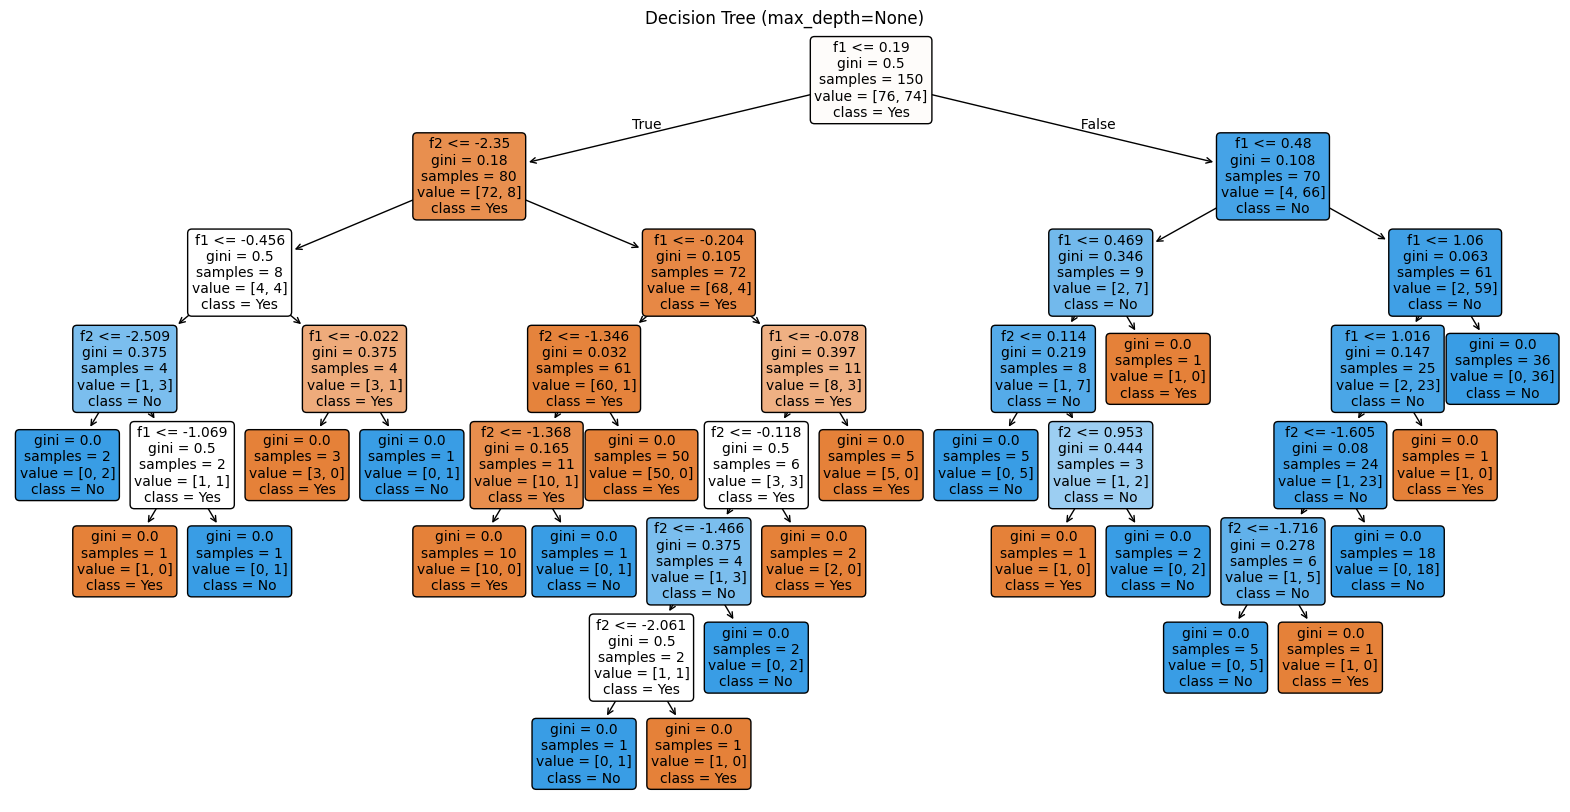

DecisionTreeClassifier()

In [ ]:
visualize_decision_tree(X, y, max_depth=None, feature_names=['f1', 'f2'], class_names=['Yes', 'No'])

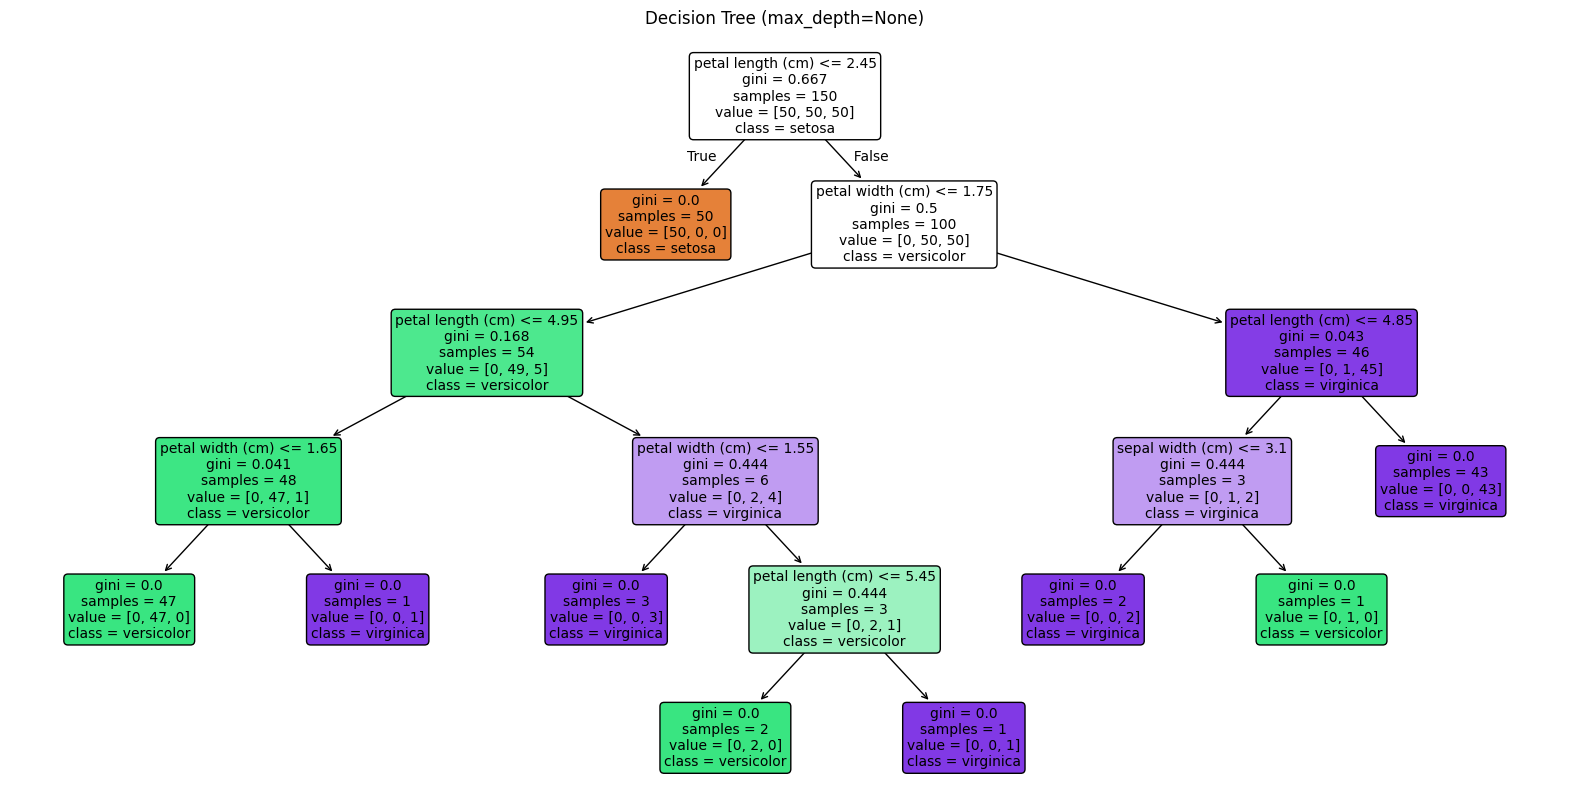

DecisionTreeClassifier()

In [ ]:
# from sklearn.datasets import load_iris
# data = load_iris()
# X = data.data
# y = data.target
# features = data.feature_names
# classes = data.target_names

# # Plot tree
# visualize_decision_tree(X, y, max_depth=None, feature_names=features, class_names=classes)